In [151]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd

In [152]:
os.chdir(r"C:\Users\Gnaneeswar\Desktop\Praxis\Econometrics\session3codesanddeck")
os.getcwd()

'C:\\Users\\Gnaneeswar\\Desktop\\Praxis\\Econometrics\\session3codesanddeck'

In [153]:
xls = pd.ExcelFile('StockPrice.xls')
df = pd.read_excel(xls, 'Sheet1')

In [155]:
df.head(10)

,Date,Close
0,2001-02-05,53.84
1,2001-02-06,53.20
2,2001-02-07,54.66
3,2001-02-08,52.30
4,2001-02-09,50.40
5,2001-02-12,53.45
6,2001-02-13,54.10
7,2001-02-14,53.00
8,2001-02-15,52.00
9,2001-02-16,52.36


In [156]:
df.describe()

,Close
count,248.000000
mean,52.354274
std,3.221100
min,44.000000
25%,50.097500
50%,52.140000
75%,54.597500
max,59.980000


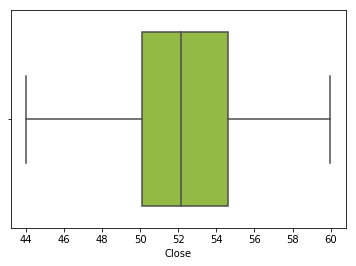

In [157]:
sns.boxplot(df.Close,color="yellowgreen")

In [158]:
train=df[0:201] 
test=df[201:248]

In [159]:
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

### Vizuvalizing the data

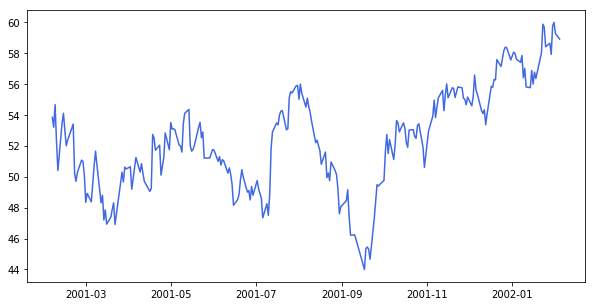

In [160]:
plt.figure(figsize=(10,5))
plt.plot(df.Date,df.Close,color="royalblue")

plt.show()

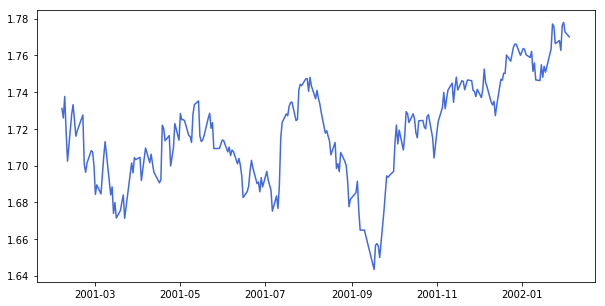

In [161]:
# taking log of data and plotting it

plt.figure(figsize=(10,5))
plt.plot(df.Date,np.log10(df.Close),color="royalblue")

plt.show()

### Train Test Split

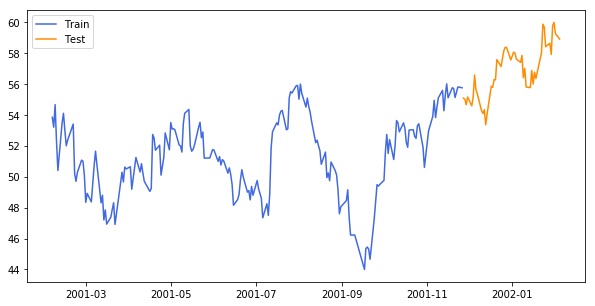

In [42]:
plt.figure(figsize=(10,5))
plt.plot(train.Date, train.Close, label='Train',color="royalblue")
plt.plot(test.Date,test.Close, label='Test',color="darkorange")

plt.legend(loc='best')
#plt.title("Train Test Split")
plt.show()

### Naive Approach

In [44]:
dd= np.asarray(train)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1][1]

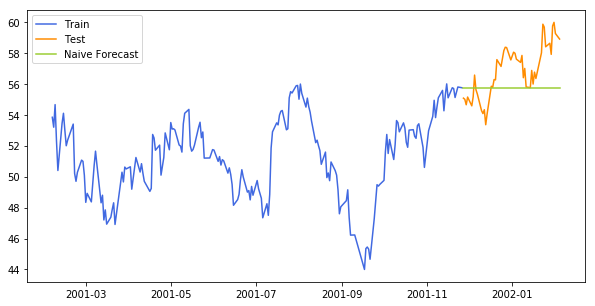

In [46]:
plt.figure(figsize=(10,5))
plt.plot(train.Date, train.Close, label='Train',color="royalblue")
plt.plot(test.Date,test.Close, label='Test',color="darkorange")
plt.plot(y_hat.Date,y_hat.naive, label='Naive Forecast',color="yellowgreen")

plt.legend(loc='best')
#plt.title("Naive Forecast")
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.Close, y_hat.naive))
print(rms)

2.000042552738805


### Simple Average

In [162]:
train=df[0:201] 
test=df[201:248]

In [164]:
for i in range(201,250):
    train.loc[i,"Close"]=np.NaN
    train.loc[i,"Close"]=np.mean(train.Close[0:i-1])

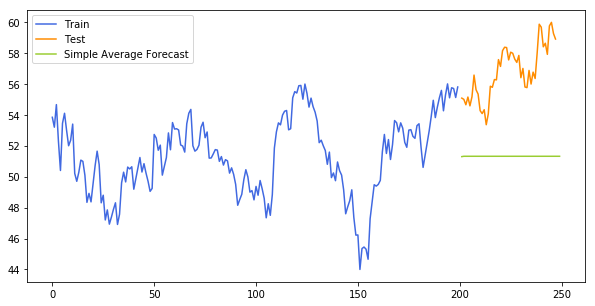

In [165]:
plt.figure(figsize=(10,5))
plt.plot(train['Close'][0:200], label='Train',color="royalblue")
plt.plot(test['Close'], label='Test',color="darkorange")
plt.plot(train['Close'][201:250], label='Simple Average Forecast',color="yellowgreen")
plt.legend(loc='best')
plt.show()

In [166]:
rms = sqrt(mean_squared_error(test.Close, train['Close'][201:248]))
print(rms)

5.724879711796905


### Moving Average

In [174]:
train=df[0:201] 
test=df[201:248]

In [175]:
train["twenty"]=train['Close'].rolling(20).mean()
train["sixty"]=train['Close'].rolling(60).mean()
train["close20"]=train["Close"]
train["close60"]=train["Close"]
train.loc[201,"close20"]=train.loc[200,"twenty"]
train.loc[201,"close60"]=train.loc[200,"sixty"]

In [176]:
for i in range(202,250):
    train.loc[i,"close20"]=np.mean(train.close20.tail(20))
   
    train.loc[i,"close60"]=np.mean(train.close60.tail(60))

In [177]:
train.loc[1:200,"close20"]=np.array(train.loc[0:199,"twenty"])
train.loc[1:200,"close60"]=np.array(train.loc[0:199,"sixty"])

train.loc[0,"close20"]=np.NaN
train.loc[0,"close60"]=np.NaN

In [179]:
train["sentiment"]=(train.close20-train.close60)

In [181]:
train["sentiment"].tail(10)

240    1.838630
241    1.819013
242    1.779012
243    1.750377
244    1.734146
245    1.729024
246    1.738907
247    1.766169
248    1.774700
249    1.794808
Name: sentiment, dtype: float64

##### Will be imported and used in R to build ARIMAX model


In [ ]:
train.to_csv("engineeredtimeseries.csv")

#### plotting

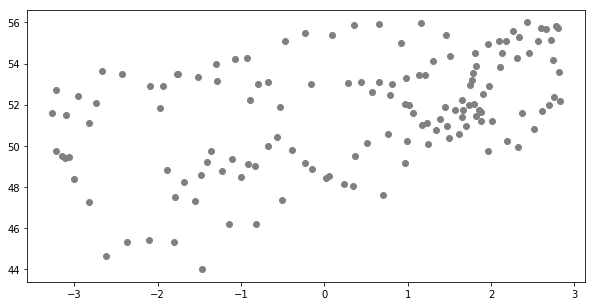

In [182]:
plt.figure(figsize=(10,5))
plt.plot(train["sentiment"],train['Close'],"o",color="grey")

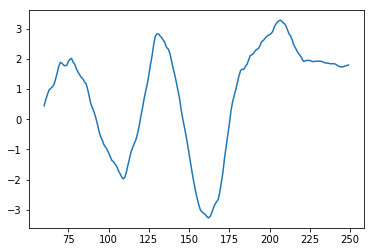

In [183]:
plt.plot(train.sentiment)

In [184]:
import numpy.ma as ma

flag=np.array(train["sentiment"])
close=np.array(train['Close'])

print(ma.corrcoef(ma.masked_invalid(flag), ma.masked_invalid(close)))

[[1.0 0.46325924630103243]
 [0.46325924630103255 1.0]]


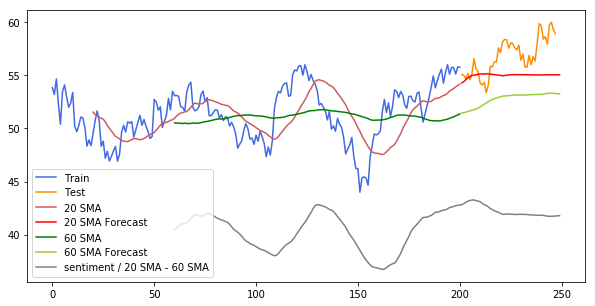

In [185]:
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train',color="royalblue")
plt.plot(test['Close'], label='Test',color="darkorange")
plt.plot(train['close20'][0:201], label='20 SMA',color="indianred")
plt.plot(train['close20'][201:250], label='20 SMA Forecast',color="red")
plt.plot(train['close60'][0:201], label='60 SMA',color="green")
plt.plot(train['close60'][201:250], label='60 SMA Forecast',color="yellowgreen")
plt.plot((train.sentiment+40),color="grey",label='sentiment / 20 SMA - 60 SMA') #added +40 to sentiment for better vizuvalization

#plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [188]:
# predicting the RMSE

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test.Close, train['close60'][201:248]))
rms1=sqrt(mean_squared_error(test.Close, train['close20'][201:248]))
print(rms)
print(rms1)

4.249922786195841
2.4535342949591024


### Linear Regression

In [162]:
import statsmodels.api as stm
train=df[0:201] 
test=df[201:248]

predictors=stm.add_constant(np.arange(0,201))
predictors=pd.DataFrame(predictors)
predictors["2"]=np.arange(0,201)**2

predictors.head()

,0,1,2
0,1.0,0.0,0
1,1.0,1.0,1
2,1.0,2.0,4
3,1.0,3.0,9
4,1.0,4.0,16


In [167]:
# using the count of the days as predictor

predictors_=stm.add_constant(np.arange(0,201))
predictors_=pd.DataFrame(predictors_)
predictors_["2"]=np.arange(0,201)**2

predictors_.head()

,0,1,2
0,1.0,0.0,0
1,1.0,1.0,1
2,1.0,2.0,4
3,1.0,3.0,9
4,1.0,4.0,16


In [168]:
model = stm.OLS(train.Close,predictors_).fit()

In [169]:
predictors1_=stm.add_constant(np.arange(0,250))
predictors1_=pd.DataFrame(predictors1_)
predictors1_["2"]=np.arange(0,250)**2

pred=model.predict(predictors1_)

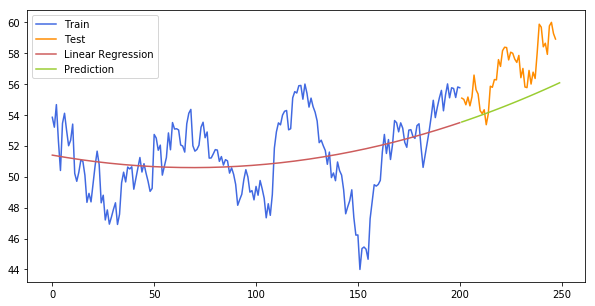

In [171]:
plt.figure(figsize=(10,5))
plt.plot(train['Close'], label='Train',color="royalblue")
plt.plot(test['Close'], label='Test',color="darkorange")
plt.plot(pred[0:201], label='Linear Regression',color="indianred")
plt.plot(np.arange(201,250),pred[201:250], label='Prediction',color="yellowgreen")


#plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [172]:
rms = sqrt(mean_squared_error(test.Close, pred[201:248]))
print(rms)

2.437893498609062


### Differenced Series

In [188]:
lag0=df[0:249].Close
lag1=df[201:249].Close

In [ ]:
diff=[]

for i in range(1,248):
    
    diff.append(lag0[i]-lag0[i-1])

In [209]:
diff1=[]

for i in range(1,248):
    
    diff1.append(np.log10(lag0[i])-np.log10(lag0[i-1]))

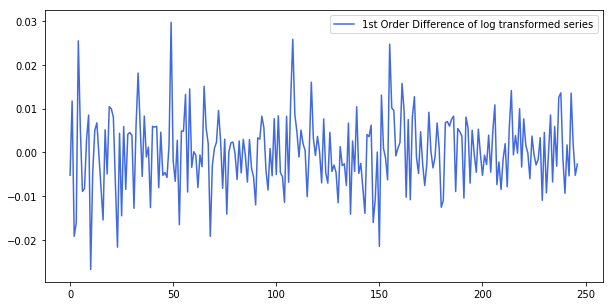

In [210]:
plt.figure(figsize=(10,5))
plt.plot(diff1, color="royalblue", label="1st Order Difference of log transformed series")
plt.legend(loc='best')
plt.show()

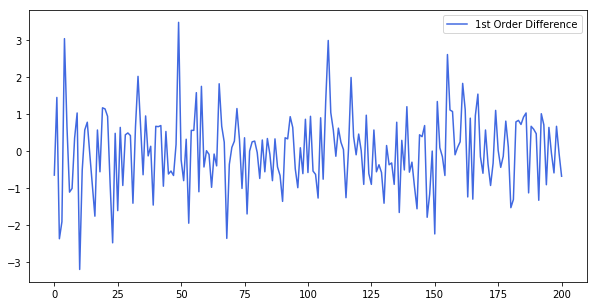

In [211]:
plt.figure(figsize=(10,5))
plt.plot(diff[0:201],color="royalblue", label="1st Order Difference")
plt.legend(loc='best')
plt.show()

### Holt’s Linear Trend method - Seasonal = 9

In [ ]:
import statsmodels.api as sm
plt.figure(figsize=(25,5))

sm.tsa.seasonal_decompose(train.Close,freq=9).plot()
result = sm.tsa.stattools.adfuller(train.Close)

plt.show()

In [ ]:
train=df[0:201] 
test=df[201:248]


y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=17 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,5))
plt.plot( train['Close'], label='Train',color="royalblue")
plt.plot(test['Close'], label='Test',color="darkorange")
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter',color="yellowgreen")
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.Holt_Winter))
print(rms)

### Holt’s Linear Trend method - Seasonal = 17

<Figure size 1800x360 with 0 Axes>

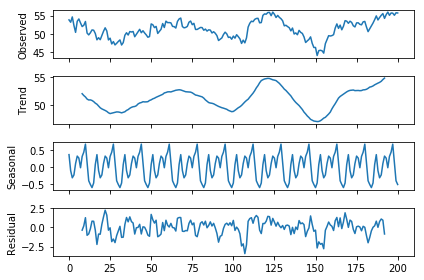

In [117]:
import statsmodels.api as sm
plt.figure(figsize=(25,5))

sm.tsa.seasonal_decompose(train.Close,freq=17).plot()
result = sm.tsa.stattools.adfuller(train.Close)

plt.show()

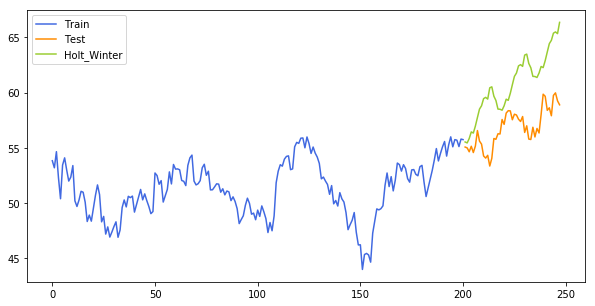

In [118]:
train=df[0:201] 
test=df[201:248]


y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=17 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(10,5))
plt.plot( train['Close'], label='Train',color="royalblue")
plt.plot(test['Close'], label='Test',color="darkorange")
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter',color="yellowgreen")
plt.legend(loc='best')
plt.show()

In [119]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.Holt_Winter))
print(rms)

4.470010510062365
